In [3]:
username = "madhurisalvakam "
key = "2cfbef426c3beb37e157dbcbe51f04b9 "

!pip install git+https://github.com/Kaggle/kaggle-api.git --upgrade
import os
credentials = {"madhurisalvakam":username,"2cfbef426c3beb37e157dbcbe51f04b9":key}
os.environ['KAGGLE_USERNAME']=credentials["madhurisalvakam"]
os.environ['KAGGLE_KEY']=credentials["2cfbef426c3beb37e157dbcbe51f04b9"]
!kaggle datasets download -d moltean/fruits
!unzip fruits.zip

  Cloning https://github.com/Kaggle/kaggle-api.git to /tmp/pip-req-build-kkn4z_6_
  Running command git clone -q https://github.com/Kaggle/kaggle-api.git /tmp/pip-req-build-kkn4z_6_
401 - Unauthorized
unzip:  cannot find or open fruits.zip, fruits.zip.zip or fruits.zip.ZIP.


In [4]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.notebook import tqdm
import torchvision.models as models

In [5]:
DATA_DIR = '../input/fruits/fruits-360'
TRAIN_DIR = DATA_DIR + '/Training'
TEST_DIR = DATA_DIR + '/Test'

In [6]:
print('The folders inside the root directory are: ')
print(os.listdir(DATA_DIR))

# The classes are the name of the folders inside the Training directory
train_classes = os.listdir(TRAIN_DIR)
print('\nThe classes on the Training directory are: ')
print(train_classes)
print('The Training directory has %s classes.' %len(train_classes))

# The classes are the name of the folders inside the Test directory
test_classes = os.listdir(TEST_DIR)
print('\nThe classes on the Test directory are: ')
print(test_classes)
print('The Training directory has %s classes. \n' %len(test_classes))

The folders inside the root directory are: 
['papers', 'LICENSE', 'Training', 'readme.md', 'test-multiple_fruits', 'Test']

The classes on the Training directory are: 
['Quince', 'Grapefruit White', 'Granadilla', 'Orange', 'Apple Red 3', 'Grape White 2', 'Corn Husk', 'Tamarillo', 'Banana Red', 'Nectarine Flat', 'Pepper Yellow', 'Nut Forest', 'Pear Monster', 'Fig', 'Tomato Heart', 'Onion Red Peeled', 'Lemon Meyer', 'Onion Red', 'Passion Fruit', 'Cucumber Ripe', 'Cactus fruit', 'Tomato not Ripened', 'Mango Red', 'Apple Pink Lady', 'Pomegranate', 'Plum', 'Pineapple', 'Tomato 1', 'Cherry 2', 'Apple Red 2', 'Avocado ripe', 'Dates', 'Maracuja', 'Papaya', 'Nut Pecan', 'Pear Stone', 'Cherry Wax Yellow', 'Eggplant', 'Apple Golden 2', 'Guava', 'Beetroot', 'Tomato Maroon', 'Potato Red', 'Apple Red Delicious', 'Cherry Wax Red', 'Kiwi', 'Cherry Wax Black', 'Limes', 'Cantaloupe 2', 'Apple Braeburn', 'Pear', 'Carambula', 'Tomato 3', 'Onion White', 'Cherry 1', 'Strawberry', 'Lychee', 'Redcurrant', 'Ra

In [7]:
print('\nThe images inside the /Test/Apple Red 2 directory are:')
print(os.listdir(TEST_DIR + '/Apple Red 2'))
print('\nThe /Test/Apple Red 2 directory has %s images.' %len(os.listdir(TEST_DIR + '/Apple Red 2')))


The images inside the /Test/Apple Red 2 directory are:
['73_100.jpg', '64_100.jpg', 'r_95_100.jpg', '83_100.jpg', 'r_91_100.jpg', 'r_42_100.jpg', 'r_83_100.jpg', '322_100.jpg', 'r_327_100.jpg', 'r_93_100.jpg', '65_100.jpg', '88_100.jpg', 'r_62_100.jpg', 'r_46_100.jpg', '39_100.jpg', '86_100.jpg', '79_100.jpg', 'r_76_100.jpg', '80_100.jpg', 'r_53_100.jpg', '74_100.jpg', 'r_78_100.jpg', '47_100.jpg', '321_100.jpg', 'r_61_100.jpg', 'r_74_100.jpg', '3_100.jpg', 'r_50_100.jpg', 'r_3_100.jpg', '35_100.jpg', '63_100.jpg', 'r_33_100.jpg', '66_100.jpg', '327_100.jpg', '94_100.jpg', '6_100.jpg', 'r_323_100.jpg', 'r_52_100.jpg', '58_100.jpg', '57_100.jpg', '85_100.jpg', '82_100.jpg', '32_100.jpg', '53_100.jpg', 'r_60_100.jpg', '36_100.jpg', 'r_41_100.jpg', 'r_37_100.jpg', 'r_322_100.jpg', 'r_87_100.jpg', '8_100.jpg', 'r_54_100.jpg', '91_100.jpg', 'r_84_100.jpg', 'r_9_100.jpg', 'r_321_100.jpg', '41_100.jpg', 'r_98_100.jpg', '50_100.jpg', 'r_4_100.jpg', '37_100.jpg', 'r_70_100.jpg', 'r_99_100.jpg'

In [8]:
train_tfms = tt.Compose([tt.RandomCrop(100, padding=10, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(),
                         tt.RandomRotation(20),
                         tt.ToTensor()
                         ])
valid_tfms = tt.Compose([tt.ToTensor()])

In [9]:
train_ds = ImageFolder(TRAIN_DIR, train_tfms)
valid_ds = ImageFolder(TEST_DIR, valid_tfms)

In [10]:
def show_example_train(img, label):
    print('Label: ', train_ds.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))
    print('Image size: ', img.size())

def show_example_test(img, label):
    print('Label: ', valid_ds.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))
    print('Image size: ', img.size())

Label:  Apple Braeburn (0)
Image size:  torch.Size([3, 100, 100])


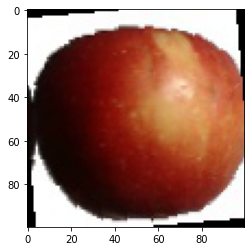

In [11]:
show_example_train(*train_ds[0])


Label:  Cantaloupe 1 (22)
Image size:  torch.Size([3, 100, 100])


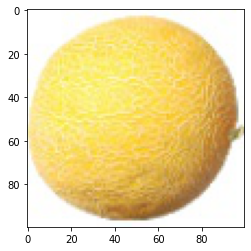

In [12]:
show_example_test(*valid_ds[3695])


In [13]:
batch_size_custom = 32      # Batch size for custom CNN model
batch_size_resnet = 32     # Batch size for resnet CNN model
random_seed = 42
torch.manual_seed(random_seed);

In [15]:
train_dl_custom = DataLoader(train_ds, batch_size_custom, shuffle=True, num_workers=3, pin_memory=True)
valid_dl_custom = DataLoader(valid_ds, batch_size_custom*2, num_workers=3, pin_memory=True)

In [16]:
train_dl_resnet = DataLoader(train_ds, batch_size_resnet, shuffle=True, num_workers=3, pin_memory=True)
valid_dl_resnet = DataLoader(valid_ds, batch_size_resnet*2, num_workers=3, pin_memory=True)

In [17]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0))
        break

train_dl_custom dataloader samples: 


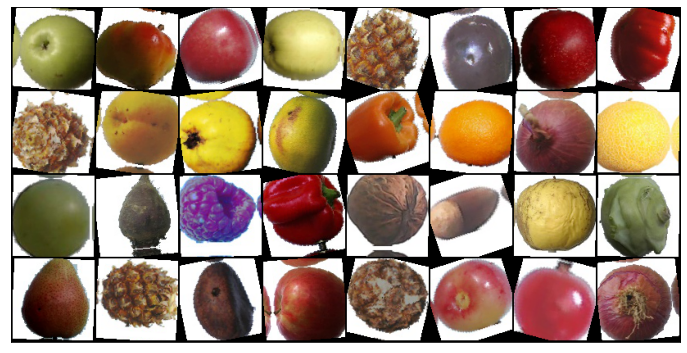

In [18]:
print('train_dl_custom dataloader samples: ')
show_batch(train_dl_custom)

valid_dl_custom dataloader samples: 


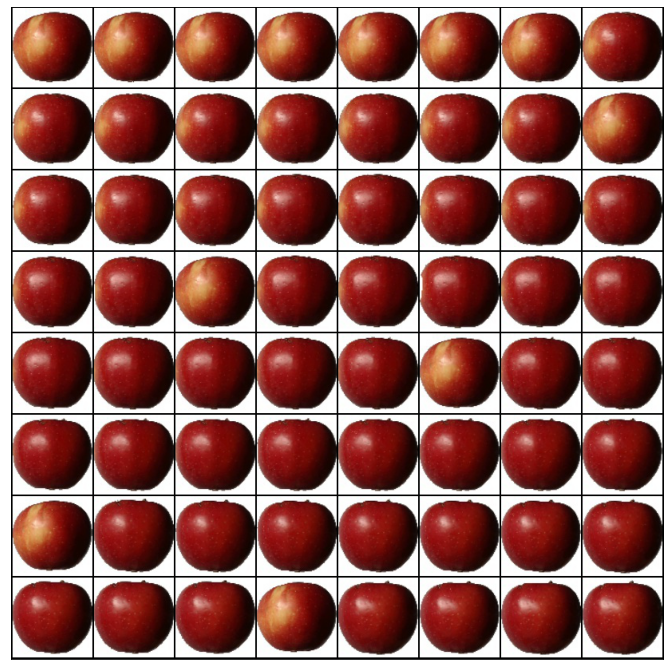

In [19]:
print('valid_dl_custom dataloader samples: ')
show_batch(valid_dl_custom)

train_dl_resnet dataloader samples: 


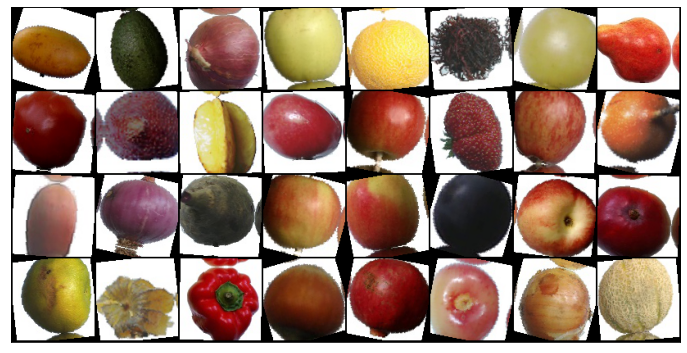

In [20]:
print('train_dl_resnet dataloader samples: ')
show_batch(train_dl_resnet)

valid_dl_resnet dataloader samples: 


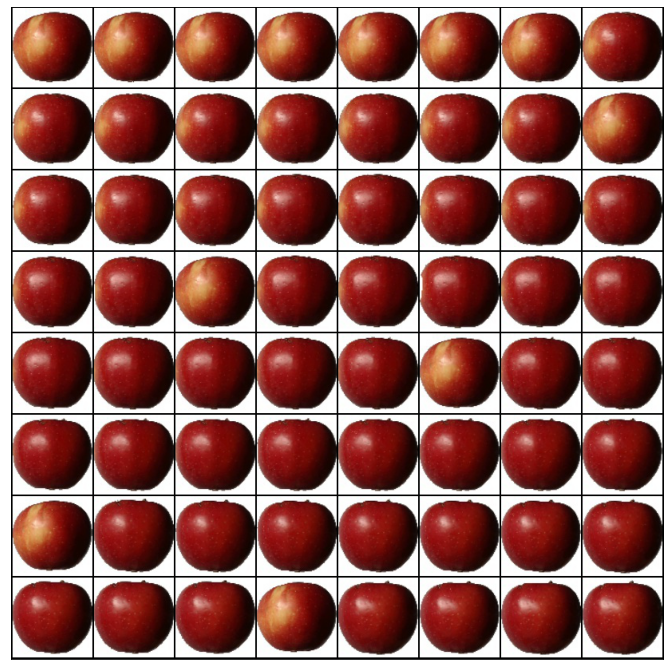

In [21]:
print('valid_dl_resnet dataloader samples: ')
show_batch(valid_dl_resnet)

In [22]:
torch.cuda.is_available()


True

In [23]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [24]:
device = get_default_device()
device

device(type='cuda')

In [25]:
train_dl_custom = DeviceDataLoader(train_dl_custom, device)
valid_dl_custom = DeviceDataLoader(valid_dl_custom, device)

In [26]:
train_dl_resnet = DeviceDataLoader(train_dl_resnet, device)
valid_dl_resnet = DeviceDataLoader(valid_dl_resnet, device)

In [27]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                      
        loss = F.cross_entropy(out, labels)                   # Calculate training loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                                    # Generate predictions
        loss = F.cross_entropy(out, labels)                   # Calculate validation loss
        acc = accuracy(out, labels)                           # Calculate accuracy
        return {'val_loss': loss.detach(),  'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()         # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()            # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.10f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [28]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels),     # Batch Normalization
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class CustomCNN(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 128)                                 # 3 x 64 x 64 
        self.conv2 = conv_block(128, 256, pool=True)                              # 128 x 32 x 32 
        self.res1 = nn.Sequential(conv_block(256, 256), conv_block(256, 256))     # 256 x 32 x 32
        
        self.conv3 = conv_block(256, 512, pool=True)                              # 512 x 16 x 16
        self.conv4 = conv_block(512, 1024, pool=True)                             # 1024 x 8 x 8
        self.res2 = nn.Sequential(conv_block(1024, 1024), conv_block(1024, 1024)) # 1024 x 8 x 8

        self.conv5 = conv_block(1024, 2048, pool=True)                            # 256 x 8 x 8
        self.conv6 = conv_block(2048, 4096, pool=True)                            # 512 x 4 x 4
        self.res3 = nn.Sequential(conv_block(4096, 4096), conv_block(4096, 4096)) # 512 x 4 x 4
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4),                          # 9216 x 1 x 1
                                        nn.Flatten(),                             # 9216
                                        nn.Linear(9216, num_classes))             # 131
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out    # Residual Block 
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out    # Residual Block
        out = self.classifier(out)
        return out

In [29]:
class ResNetCNN(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet34(pretrained=True)     # You can change the resnet model here
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, 131)          # Output classes
    
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))
    
    def freeze(self):
        # To freeze the residual layers
        for param in self.network.parameters():
            param.require_grad = False
        for param in self.network.fc.parameters():
            param.require_grad = True
    
    def unfreeze(self):
        # Unfreeze all layers
        for param in self.network.parameters():
            param.require_grad = True

In [30]:
def evaluate(model, val_loader):
    print('Evaluating Model ...')
    model.eval()
    outputs = [model.validation_step(batch) for batch in tqdm(val_loader)]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        print('\nTraining Model ...')
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [31]:
epochs = 10
max_lr = 1e-3
grad_clip = 1e-1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [32]:
input_channels = 3
output_classes = 131 

custom_model = to_device(CustomCNN(input_channels, output_classes), device)
custom_model

CustomCNN(
  (conv1): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inpla

In [33]:
for images, labels in train_dl_custom:
    print('images.shape:', images.shape)
    out = custom_model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([32, 3, 100, 100])
out.shape: torch.Size([32, 131])
out[0]: tensor([-0.8953,  0.6219, -0.2707, -0.8532, -1.1985, -0.4809, -0.1291, -1.2035,
         0.0706,  0.8386,  2.1520,  1.5752,  1.2696, -1.6712, -2.9117, -0.5085,
         0.2165,  1.2009,  0.8089, -0.0689,  1.4174, -0.3311,  1.1774, -3.6939,
        -0.2782, -0.5409, -0.7666, -0.3336, -2.0814, -0.1310, -1.9930, -0.2042,
        -0.6177,  0.9115,  0.2216,  0.6040,  0.7590, -1.1781, -2.2872, -1.8581,
         3.0666,  3.1821, -1.5995,  0.2038, -0.4181,  1.4899, -0.1994,  1.1261,
         1.1233,  1.6785,  1.7383, -0.7660, -2.6307, -0.8562,  0.7418, -0.7676,
         0.8566,  0.2977, -1.9143, -0.5183, -0.6063, -1.1717, -0.4238,  0.2687,
         0.9175,  1.6721,  0.8146, -3.0283, -0.6908, -1.3088, -1.6231, -0.4585,
        -0.0307,  1.8078,  0.0409,  0.0549, -1.2605, -1.7610, -0.6599, -1.4616,
         1.9386,  1.2792,  1.1149, -0.4746,  1.9153, -0.7364, -0.8981, -0.8015,
        -1.7244, -0.4935,  1.0756, 

In [34]:
history_CustomCNN = [evaluate(custom_model, valid_dl_custom)]
history_CustomCNN

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

[{'val_loss': 4.875748157501221, 'val_acc': 0.00809859111905098}]

In [35]:
%%time
history_CustomCNN += fit_one_cycle(epochs, max_lr, custom_model, train_dl_custom, valid_dl_custom, 
                                  grad_clip=grad_clip, 
                                  weight_decay=weight_decay, 
                                  opt_func=opt_func)



Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [0], last_lr: 0.0002798628, train_loss: 0.6888, val_loss: 0.6339, val_acc: 0.8719

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [1], last_lr: 0.0007599314, train_loss: 0.4068, val_loss: 0.2307, val_acc: 0.9462

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [2], last_lr: 0.0010000000, train_loss: 0.1084, val_loss: 0.1816, val_acc: 0.9500

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [3], last_lr: 0.0009504846, train_loss: 0.1195, val_loss: 0.1813, val_acc: 0.9591

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [4], last_lr: 0.0008117457, train_loss: 0.0990, val_loss: 0.2361, val_acc: 0.9433

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [5], last_lr: 0.0006112620, train_loss: 0.0449, val_loss: 0.0826, val_acc: 0.9851

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [6], last_lr: 0.0003887420, train_loss: 0.0261, val_loss: 0.0631, val_acc: 0.9874

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [7], last_lr: 0.0001882583, train_loss: 0.0095, val_loss: 0.0655, val_acc: 0.9876

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [8], last_lr: 0.0000495194, train_loss: 0.0036, val_loss: 0.0285, val_acc: 0.9936

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [9], last_lr: 0.0000000040, train_loss: 0.0008, val_loss: 0.0317, val_acc: 0.9941
CPU times: user 50min 5s, sys: 28min 1s, total: 1h 18min 6s
Wall time: 1h 19min 25s


In [37]:
history_ResNetCNN = [evaluate(resnet_model, valid_dl_resnet)]
history_ResNetCNN

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

[{'val_loss': 4.887930870056152, 'val_acc': 0.0018045774195343256}]

In [39]:
resnet_model.freeze()


In [40]:
%%time
history_ResNetCNN += fit_one_cycle(5, 1e-2, resnet_model, train_dl_resnet, valid_dl_resnet, 
                                  grad_clip=grad_clip, 
                                  weight_decay=weight_decay, 
                                  opt_func=opt_func)


Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [0], last_lr: 0.0075986279, train_loss: 4.0344, val_loss: 4.2096, val_acc: 0.1659

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [1], last_lr: 0.0095048463, train_loss: 4.0241, val_loss: 4.0249, val_acc: 0.3596

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [2], last_lr: 0.0061126202, train_loss: 3.9835, val_loss: 4.0798, val_acc: 0.4063

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [3], last_lr: 0.0018825835, train_loss: 3.9472, val_loss: 3.9511, val_acc: 0.7519

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [4], last_lr: 0.0000000400, train_loss: 3.9218, val_loss: 3.9198, val_acc: 0.8947
CPU times: user 11min 7s, sys: 32.7 s, total: 11min 40s
Wall time: 13min 44s


In [41]:
resnet_model.unfreeze()


In [42]:
%%time
history_ResNetCNN += fit_one_cycle(5, 1e-3, resnet_model, train_dl_resnet, valid_dl_resnet, 
                                  grad_clip=grad_clip, 
                                  weight_decay=weight_decay, 
                                  opt_func=opt_func)


Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [0], last_lr: 0.0007598628, train_loss: 3.9182, val_loss: 3.9260, val_acc: 0.8563

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [1], last_lr: 0.0009504846, train_loss: 3.9198, val_loss: 3.9169, val_acc: 0.8904

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [2], last_lr: 0.0006112620, train_loss: 3.9146, val_loss: 3.9174, val_acc: 0.9035

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [3], last_lr: 0.0001882583, train_loss: 3.9097, val_loss: 3.9083, val_acc: 0.9356

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [4], last_lr: 0.0000000040, train_loss: 3.9056, val_loss: 3.9081, val_acc: 0.9349
CPU times: user 11min 23s, sys: 33.2 s, total: 11min 56s
Wall time: 13min 59s


In [43]:
def plot_accuracies(history, model_name):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title(model_name + ' - Accuracy vs. No. of epochs');

def plot_losses(history, model_name):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title(model_name + ' - Loss vs. No. of epochs');

def plot_lrs(history, model_name):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title(model_name + ' - Learning Rate vs. Batch no.');

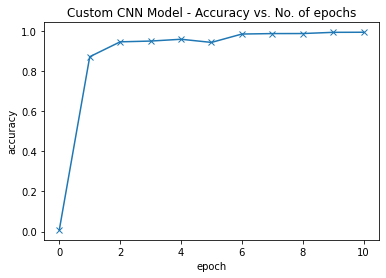

In [45]:
plot_accuracies(history_CustomCNN, 'Custom CNN Model')


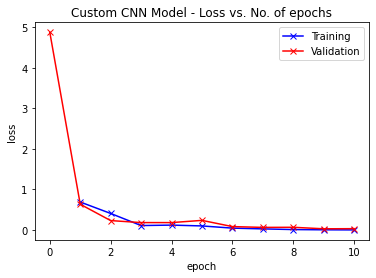

In [46]:
plot_losses(history_CustomCNN, 'Custom CNN Model')


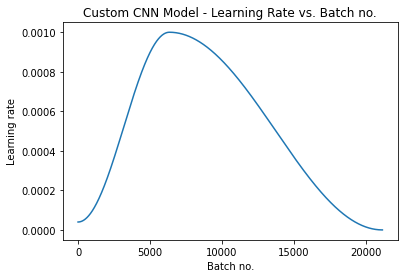

In [47]:
plot_lrs(history_CustomCNN, 'Custom CNN Model')


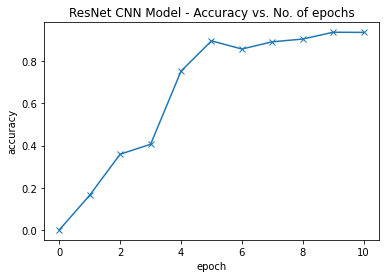

In [48]:
plot_accuracies(history_ResNetCNN, 'ResNet CNN Model')


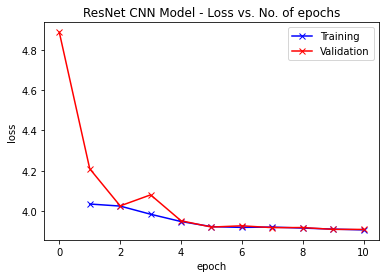

In [44]:
plot_losses(history_ResNetCNN, 'ResNet CNN Model')


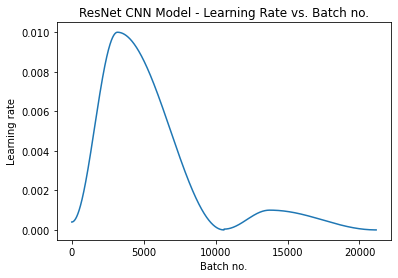

In [49]:
plot_lrs(history_ResNetCNN, 'ResNet CNN Model')


In [50]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return valid_ds.classes[preds[0].item()]

Label: Avocado ripe , Predicted: Avocado ripe


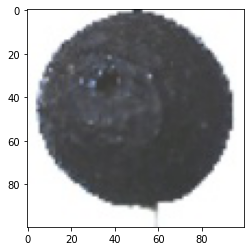

In [51]:
img, label = valid_ds[2569]
plt.imshow(img.permute(1, 2, 0))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, custom_model))

Label: Kumquats , Predicted: Kumquats


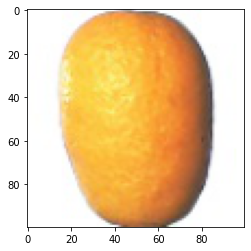

In [52]:
img, label = valid_ds[9856]
plt.imshow(img.permute(1, 2, 0))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, custom_model))

Label: Avocado ripe , Predicted: Avocado ripe


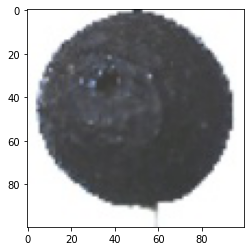

In [53]:
img, label = valid_ds[2569]
plt.imshow(img.permute(1, 2, 0))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, resnet_model))

Label: Kumquats , Predicted: Kumquats


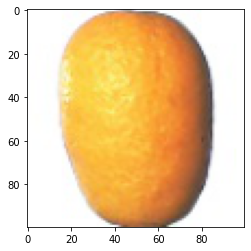

In [54]:
img, label = valid_ds[9856]
plt.imshow(img.permute(1, 2, 0))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, resnet_model))

In [58]:
torch.save(custom_model.state_dict(), 'fruits-360-custom.pth')
torch.save(resnet_model.state_dict(), 'fruits-360-resnet.pth')

In [60]:
project_name = 'Final Project - Deep Learning with PyTorch'
!pip install jovian --upgrade --quiet
import jovian
jovian.commit(project=project_name,  
              outputs=['./fruits-360-custom.pth', './fruits-360-resnet.pth'],
              environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: 

 ·································································································································································································································································································································


[jovian] Uploading notebook to https://jovian.ai/madhurisalvakam/Final Project - Deep Learning with PyTorch


<IPython.core.display.Javascript object>